In [182]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [158]:
orders = pd.read_csv('data/Orders.csv')
returns = pd.read_csv('data/Returns.csv')
orders.shape
#returns.shape



(51290, 24)

In [172]:
orders.columns
orders = pd.read_csv('data/Orders.csv')
#data.loc[:, ['Profit']] = data.Profit.str.replace('$','').str.replace(',','').astype(float)
orders.loc[:, ['Profit']] = orders.Profit.map(lambda x: float(re.sub('[$,]', '', x)))
orders.loc[:, ['Sales']] = orders.Sales.map(lambda x: float(re.sub('[$,]', '', x)))

orders.Profit.dtype

dtype('float64')

In [173]:
print(orders.columns)
orders.head()

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')


,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [174]:
orders.loc[:,'Order.Date'] = pd.to_datetime(orders.loc[:,'Order.Date'])
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [246]:
orders.loc[:,'Order.Month'] = orders.loc[:,'Order.Date'].apply(lambda x: x.month_name())
orders.loc[:,'Order.Month.Num'] = orders.loc[:,'Order.Date'].apply(lambda x: x.month)
orders.loc[:,'Order.Year'] = orders.loc[:,'Order.Date'].apply(lambda x: x.year)

In [176]:
temp = orders.iloc[1,2]
temp.month_name()
print(orders.columns)
orders.head()
#data.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Order.Month',
       'Order.Year'],
      dtype='object')


,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,November,2014
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,February,2014
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,October,2014
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,January,2014
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,November,2014


In [177]:
#data.groupby(['Order.Year']).agg({'Profit':'sum', 'Returns':'sum'})
orders.iloc[1,:]
#data['Order.Month'].apply(lambda x:

Row.ID                                                26341
Order.ID                             IN-2014-JR162107-41675
Order.Date                              2014-02-05 00:00:00
Ship.Date                                            2/7/14
Ship.Mode                                      Second Class
Customer.ID                                       JR-162107
Customer.Name                                 Justin Ritter
Segment                                           Corporate
Postal.Code                                             NaN
City                                             Wollongong
State                                       New South Wales
Country                                           Australia
Region                                              Oceania
Market                                         Asia Pacific
Product.ID                                      FUR-CH-5379
Category                                          Furniture
Sub.Category                            

In [293]:
returns.columns = ['Returned', 'Order.ID', 'Region']
returns.columns
data = pd.merge(orders,returns, how='left', on=['Order.ID','Region'])
data.shape
data.loc[data.Returned == 'Yes']
#data.loc[data.Returned != ]

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Order.Month.Num,Season,Returned
26,30191,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2,0.00,720.36,725.570,Critical,December,2012,12,Winter,Yes
53,30190,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,5,0.00,153.75,627.270,Critical,December,2012,12,Winter,Yes
75,25438,IN-2015-JH158207-42140,2015-05-16,5/18/15,Second Class,JH-158207,John Huston,Consumer,NaN,Melbourne,...,5,0.10,858.90,581.880,Critical,May,2015,5,Spring,Yes
110,32648,CA-2014-AS10045140-41727,2014-03-29,4/1/14,First Class,AS-100451408,Aaron Smayling,Corporate,22204.0,Arlington,...,2,0.00,7.85,3.810,Medium,March,2014,3,Spring,Yes
113,29629,IN-2014-LC168857-41747,2014-04-18,4/19/14,First Class,LC-168857,Lena Creighton,Consumer,NaN,Sydney,...,5,0.10,587.19,511.470,Critical,April,2014,4,Spring,Yes
137,30267,ID-2013-AB1001527-41439,2013-06-14,6/17/13,First Class,AB-1001527,Aaron Bergman,Consumer,NaN,Wuhan,...,8,0.50,-286.92,487.320,Critical,June,2013,6,Summer,Yes
151,15162,ES-2015-RA1994545-42218,2015-08-02,8/3/15,First Class,RA-1994545,Ryan Akin,Consumer,NaN,Le Petit-Quevilly,...,3,0.10,296.66,472.000,Critical,August,2015,8,Summer,Yes
163,30187,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,3,0.00,311.85,458.970,Critical,December,2012,12,Winter,Yes
178,18990,ES-2014-JF15295120-41924,2014-10-12,10/12/14,Same Day,JF-15295120,Jason Fortune-,Consumer,NaN,Valencia,...,6,0.00,139.32,443.920,Critical,October,2014,10,Fall,Yes
200,24361,IN-2014-NM1844527-41800,2014-06-10,6/10/14,Same Day,NM-1844527,Nathan Mautz,Home Office,NaN,Shenzhen,...,4,0.00,0.00,427.100,Critical,June,2014,6,Summer,Yes


In [294]:
data.groupby(['Order.Year','Returned']).agg({'Sales': 'sum'})

,,Sales
Order.Year,Returned,
2012,Yes,111210.65
2013,Yes,95786.95
2014,Yes,131839.16
2015,Yes,183664.16


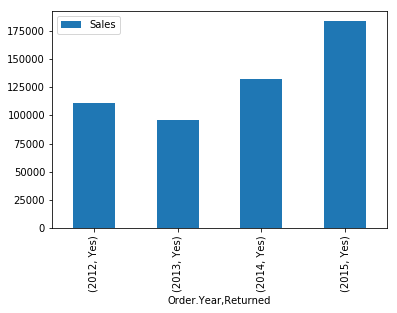

In [295]:
data.groupby(['Order.Year', 'Returned']).agg({'Sales': 'sum'}).plot.bar()

In [296]:
print(data.loc[data.Returned == 'Yes'].groupby(['Customer.Name']).agg({'Order.ID':'count'}).count())
customer_count = data.loc[data.Returned == 'Yes'].groupby(['Customer.Name']).agg({'Order.ID':'count'})
customer_count.columns = ['Count']
print(data.head())
customer_count[customer_count.Count > 5].count()


Order.ID    589
dtype: int64
   Row.ID                  Order.ID Order.Date Ship.Date     Ship.Mode  \
0   40098  CA-2014-AB10015140-41954 2014-11-11  11/13/14   First Class   
1   26341    IN-2014-JR162107-41675 2014-02-05    2/7/14  Second Class   
2   25330    IN-2014-CR127307-41929 2014-10-17  10/18/14   First Class   
3   13524   ES-2014-KM1637548-41667 2014-01-28   1/30/14   First Class   
4   47221   SG-2014-RH9495111-41948 2014-11-05   11/6/14      Same Day   

    Customer.ID     Customer.Name      Segment  Postal.Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

     ...    Quantity Discount  Profit Shipping.Cost Order

Count    123
dtype: int64

In [297]:
region_return = data[data.Returned == 'Yes'].groupby('Region').agg({'Order.ID': 'count'}).sort_values('Order.ID')
region_return

,Order.ID
Region,
Central Asia,9
Central Africa,17
Eastern Africa,18
Southern Africa,25
Eastern Europe,42
North Africa,51
Western Africa,60
Caribbean,69
Central US,71


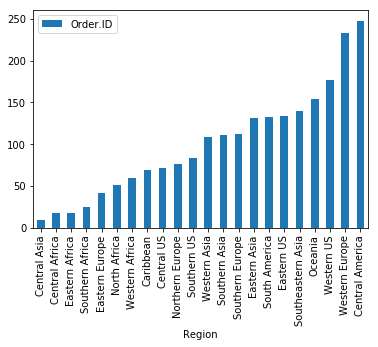

In [298]:
region_return.plot.bar()

In [299]:
data[data.Returned == 'Yes'].groupby('Category').agg({'Order.ID': 'count'}).sort_values('Order.ID')


,Order.ID
Category,
Furniture,426
Technology,442
Office Supplies,1334


In [301]:
data[data.Returned == 'Yes'].groupby('Sub.Category').agg({'Order.ID': 'count'}).sort_values('Order.ID')

,Order.ID
Sub.Category,
Tables,41
Appliances,59
Machines,62
Copiers,98
Envelopes,99
Supplies,102
Fasteners,102
Bookcases,103
Furnishings,135


In [302]:
data_backup = data.copy()


In [311]:

def season_helper(x):
    bins = [['December', 'January', 'February'],['March','April','May'],['June','July', 'August'],['September', 'October', 'November']]
    labels = ['Winter', 'Spring','Summer','Fall']
    for i in range(len(labels)):
        if x in bins[i]:            
            return labels[i]
        
data['Season'] = data['Order.Month'].apply(season_helper)
len(labels)
data
data.Returned = data.Returned.fillna(0)
data.loc[data.Returned == 'Yes', ['Returned']] = 1
#data[data.Returned == 'Yes', ['Returned']] 


C:\Users\seanj\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [309]:
data

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Order.Month.Num,Season,Returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.00,62.15,40.770,High,November,2014,11,Fall,0
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,9,0.10,-288.77,923.630,Critical,February,2014,2,Winter,0
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,9,0.10,919.97,915.490,Medium,October,2014,10,Fall,0
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,5,0.10,-96.54,910.160,Medium,January,2014,1,Winter,0
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,8,0.00,311.52,903.040,Critical,November,2014,11,Fall,0
5,22732,IN-2014-JM156557-41818,2014-06-28,7/1/14,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,5,0.10,763.28,897.350,Critical,June,2014,6,Summer,0
6,30570,IN-2012-TS2134092-41219,2012-11-06,11/8/12,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,4,0.00,564.84,894.770,Critical,November,2012,11,Fall,0
7,31192,IN-2013-MB1808592-41378,2013-04-14,4/18/13,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,6,0.00,996.48,878.380,High,April,2013,4,Spring,0
8,40099,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.00,54.71,25.270,High,November,2014,11,Fall,0
9,36258,CA-2012-AB10015140-40974,2012-03-06,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,1,0.20,5.48,11.130,High,March,2012,3,Spring,0


In [310]:
data.loc[:,'Ship.Date'] = pd.to_datetime(data.loc[:,'Ship.Date'])
data.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Order.Month.Num,Season,Returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.0,62.15,40.77,High,November,2014,11,Fall,0
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,9,0.1,-288.77,923.63,Critical,February,2014,2,Winter,0
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,9,0.1,919.97,915.49,Medium,October,2014,10,Fall,0
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,5,0.1,-96.54,910.16,Medium,January,2014,1,Winter,0
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,8,0.0,311.52,903.04,Critical,November,2014,11,Fall,0


In [282]:
data.transform

True

In [332]:
data['Process.Time'] = data['Ship.Date'] - data['Order.Date']
data['Process.Time'] = data['Process.Time'].dt.days
data.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Order.Month.Num,Season,Returned,Order.Time,Process.Time
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,62.15,40.77,High,November,2014,11,Fall,0,2 days,2
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,-288.77,923.63,Critical,February,2014,2,Winter,0,2 days,2
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,919.97,915.49,Medium,October,2014,10,Fall,0,1 days,1
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,-96.54,910.16,Medium,January,2014,1,Winter,0,2 days,2
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,311.52,903.04,Critical,November,2014,11,Fall,0,1 days,1


In [356]:
product_returns = data.groupby('Product.ID').agg({'Returned': 'sum'})
product_returns[product_returns['Returned'] > 0]
product_returns.columns = ['Returned.Sum']
data = pd.merge(data, product_returns, how='left', on='Product.ID')

In [385]:
returned = data['Returned']
print(data.columns)
new_columns = ['Ship.Mode', 'Segment', 'Market', 'Category', 'Sales', 'Quantity', 'Discount', 'Shipping.Cost', 'Order.Priority', 'Order.Month', 'Season', 'Process.Time', 'Returned.Sum']
features = data.loc[:,new_columns]
features['Price'] = round(features['Sales']/features['Quantity'], 2)
features.head()


Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Order.Month',
       'Order.Year', 'Order.Month.Num', 'Season', 'Returned', 'Order.Time',
       'Process.Time', 'Returned.Sum'],
      dtype='object')


,Ship.Mode,Segment,Market,Category,Sales,Quantity,Discount,Shipping.Cost,Order.Priority,Order.Month,Season,Process.Time,Returned.Sum,Price
0,First Class,Consumer,USCA,Technology,221.98,2,0.0,40.77,High,November,Fall,2,0,110.99
1,Second Class,Corporate,Asia Pacific,Furniture,3709.40,9,0.1,923.63,Critical,February,Winter,2,2,412.16
2,First Class,Consumer,Asia Pacific,Technology,5175.17,9,0.1,915.49,Medium,October,Fall,1,2,575.02
3,First Class,Home Office,Europe,Technology,2892.51,5,0.1,910.16,Medium,January,Winter,2,0,578.50
4,Same Day,Consumer,Africa,Technology,2832.96,8,0.0,903.04,Critical,November,Fall,1,0,354.12


In [374]:
import sklearn.model_selection as ms

x_train, x_test, y_train, y_test = ms.train_test_split(pd.get_dummies(features), returned, 
                                                       test_size=0.2, random_state=0)

In [376]:
ms_k5s = ms.StratifiedKFold(n_splits=5)


In [399]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [400]:
scores = ms.cross_val_score(estimator=logit, X=x_train, y=y_train, cv=ms_k5s)
scores

array([0.95540936, 0.95393614, 0.95491104, 0.95296125, 0.95454545])

In [403]:
logit.score(x_test, y_test)

0.9565217391304348